# Metal Earth Analysis

Analyzing the intersection of Tolkien references and metal band names from Metal Archives.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set up plotting - simpler setup
plt.style.use('default')  # Use default style instead of seaborn
sns.set_theme()  # Let seaborn set its own defaults
plt.rcParams['figure.figsize'] = [12, 6]

## Load and Clean Data

In [3]:
# First load the CSV data
df = pd.read_csv('reports/metal_band_matches.csv')

# Create a matches-only dataframe
matches_df = df[df['Band Name'] != 'No match found'].copy()

# Load proper nouns
with open('reports/unique_proper_nouns.txt', 'r', encoding='utf-8') as f:
    proper_nouns = {line.strip() for line in f}  # Using a set for faster lookups

# Filter matches_df to only include proper nouns
proper_noun_matches = matches_df[matches_df['Search Name'].isin(proper_nouns)]

# Count and plot most common search terms that found matches
term_counts = proper_noun_matches['Search Name'].value_counts()

# Print the top 10 with counts
print("\nTop 10 Most Used Proper Noun References:")
for term, count in term_counts.head(10).items():
    print(f"{term}: {count} bands")

# Print some statistics
print(f"\nTotal proper nouns with matches: {len(proper_noun_matches)}")
print(f"Percentage of matched terms that are proper nouns: {len(proper_noun_matches)/len(matches_df):.1%}")


Top 10 Most Used Proper Noun References:
Mordor: 14 bands
Sauron: 11 bands
Gorthaur: 7 bands
Orthanc: 7 bands
Nazgul: 7 bands
Melkor: 6 bands
Esgaroth: 6 bands
Isengard: 6 bands
Carcharoth: 5 bands
Ungoliant: 5 bands

Total proper nouns with matches: 405
Percentage of matched terms that are proper nouns: 40.3%


## Most Popular References

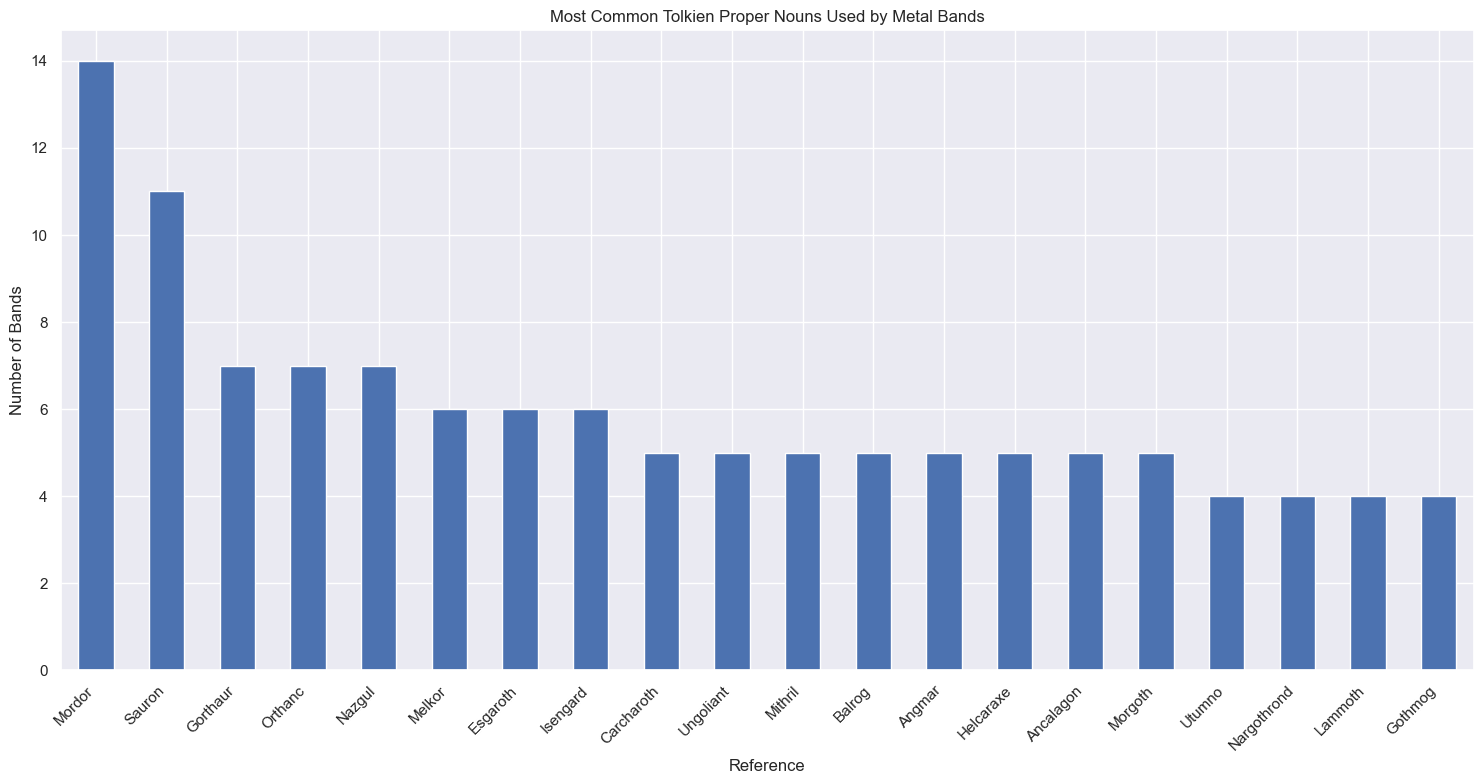

In [4]:
plt.figure(figsize=(15, 8))
term_counts.head(20).plot(kind='bar')
plt.title('Most Common Tolkien Proper Nouns Used by Metal Bands')
plt.xlabel('Reference')
plt.ylabel('Number of Bands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Name Length Analysis


Reference Length Statistics:
count    1005.000000
mean        7.589055
std         2.425232
min         3.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        18.000000
Name: Term Length, dtype: float64


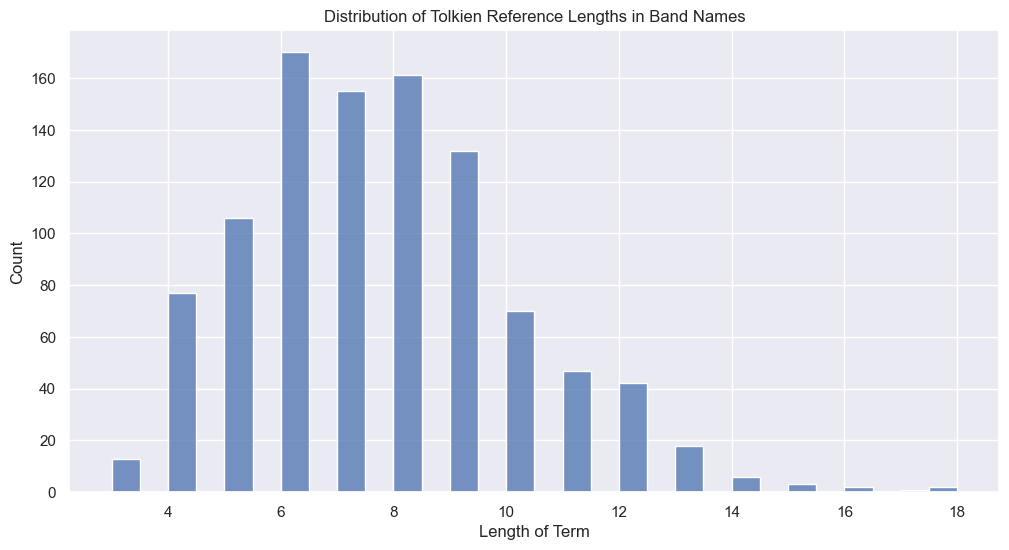

In [5]:
# Analyze term lengths
matches_df['Term Length'] = matches_df['Search Name'].str.len()

plt.figure(figsize=(12, 6))
sns.histplot(data=matches_df, x='Term Length', bins=30)
plt.title('Distribution of Tolkien Reference Lengths in Band Names')
plt.xlabel('Length of Term')
plt.ylabel('Count')

# Print some statistics
print("\nReference Length Statistics:")
print(matches_df['Term Length'].describe())

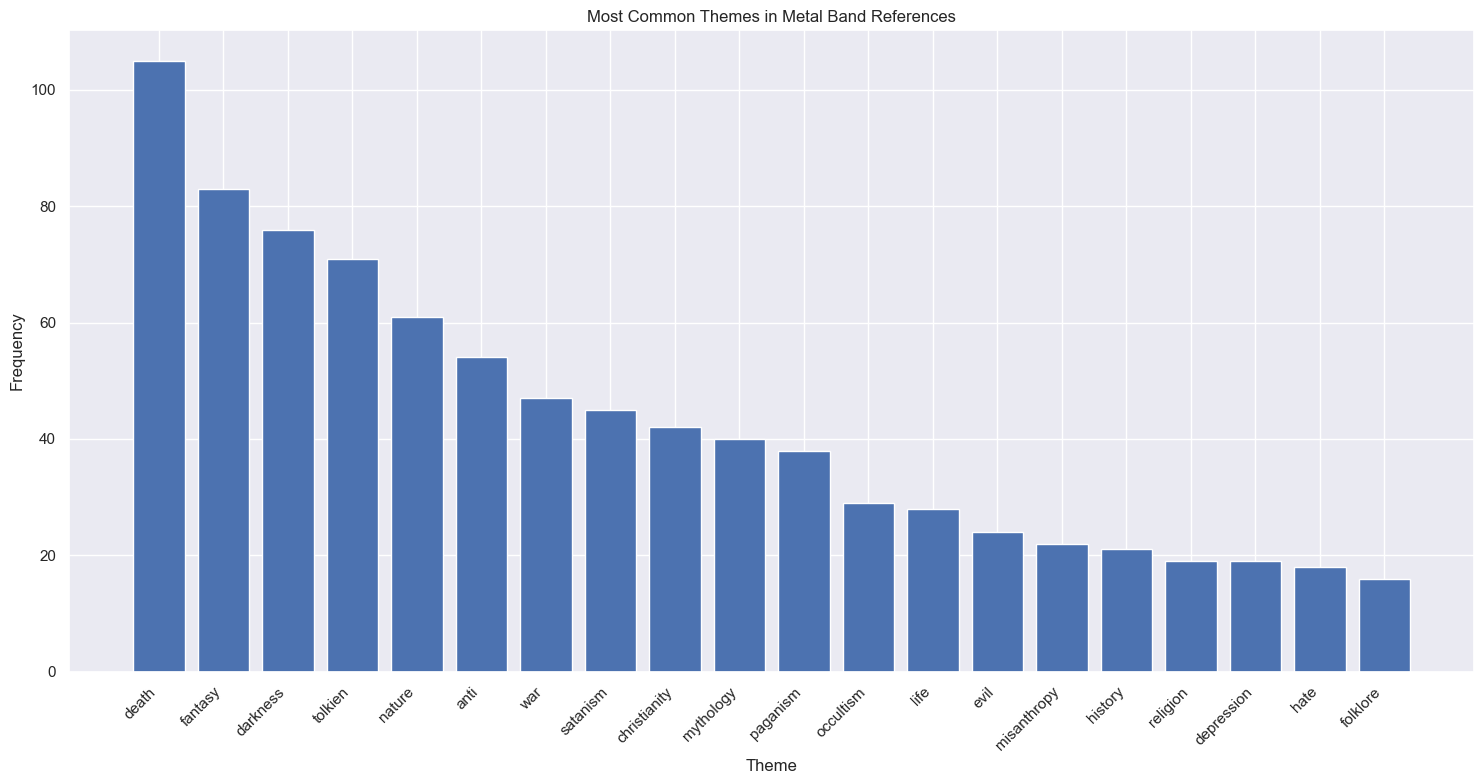

In [6]:
# Create a simple frequency-based visualization of themes
from collections import Counter
import re

# Extract themes from the 'Themes' column, handling NaN values
themes_text = ' '.join([str(theme) for theme in matches_df['Themes'].dropna()])

# Split into words and clean up
words = re.findall(r'\w+', themes_text.lower())
word_counts = Counter(words)

# Remove common words and single letters
stop_words = {'the', 'and', 'of', 'in', 'a', 'to', 'n'}
word_counts = {word: count for word, count in word_counts.items() 
               if word not in stop_words and len(word) > 1}

# Create bar chart of top themes
plt.figure(figsize=(15, 8))
top_themes = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20])
plt.bar(top_themes.keys(), top_themes.values())
plt.title('Most Common Themes in Metal Band References')
plt.xlabel('Theme')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()




Band Formation Year Statistics:
count     806.000000
mean     2003.441687
std         9.270186
min      1971.000000
25%      1997.000000
50%      2003.000000
75%      2010.000000
max      2024.000000
Name: Formed, dtype: float64

Earliest band formed: 1971
Most recent band formed: 2024


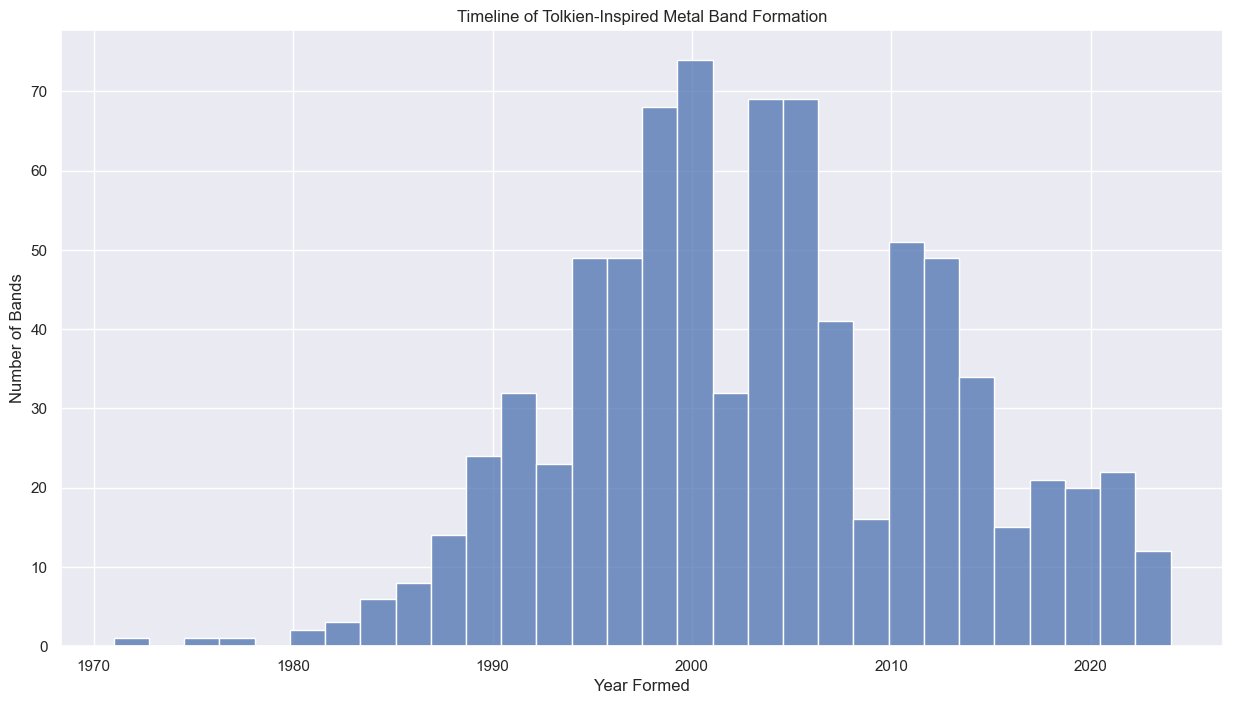

In [8]:
formed_years = pd.to_numeric(matches_df['Formed'], errors='coerce')
formed_years = formed_years.dropna()

plt.figure(figsize=(15, 8))
sns.histplot(data=formed_years, bins=30)
plt.title('Timeline of Tolkien-Inspired Metal Band Formation')
plt.xlabel('Year Formed')
plt.ylabel('Number of Bands')

# Add some statistics
print("\nBand Formation Year Statistics:")
print(formed_years.describe())
print(f"\nEarliest band formed: {int(formed_years.min())}")
print(f"Most recent band formed: {int(formed_years.max())}")
